1\. **Pandas DataFrame**

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a pair of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every x BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
# If haven't downloaded it yet, please get the data file with wget
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/

--2023-12-07 16:08:19--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/xvjzaxzz3ysphme/data_000637.txt [following]
--2023-12-07 16:08:19--  https://www.dropbox.com/s/raw/xvjzaxzz3ysphme/data_000637.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc001a1cb41a4a51da690ec94dd.dl.dropboxusercontent.com/cd/0/inline/CI9HTdJfW7cmyHyq6y8cnLkiYZtLyN9zKKcYKlGfHlcaJ5h3eF7M4Pd8DhuqQFvGg5xPafKn-U7fVBrzRK-PsD2Iw6SOMz8Awj67aTx7sJoiApsudwET6gZx4hb-nTPFxAo/file# [following]
--2023-12-07 16:08:20--  https://ucc001a1cb41a4a51da690ec94dd.dl.dropboxusercontent.com/cd/0/inline/CI9HTdJfW7cmyHyq6y8cnLkiYZtLyN9zKKcYKlGfHlcaJ5h3eF7M4Pd8DhuqQFvGg5xPafKn-U7fVBrzRK-PsD2Iw6SOMz8Awj67aTx7sJoiApsudw

1\. Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [3]:
import pandas as pd
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('fivethirtyeight')


In [20]:
# Maximum number of rows >= N > 10k
N = 1710690
data = pd.read_csv('data/data_000637.txt', nrows = N)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


2\. Estimate the number of BX in a ORBIT (the value `x`).

*Hint*: check when the BX counter reaches the maximum value before being reset to 0.

In [21]:
data['BX_COUNTER_CHANGE'] = data['BX_COUNTER'].diff()
data.loc[data.BX_COUNTER_CHANGE >= -100, 'BX_COUNTER_CHANGE'] = 0
data.loc[data.BX_COUNTER_CHANGE < -100, 'BX_COUNTER_CHANGE'] = 1

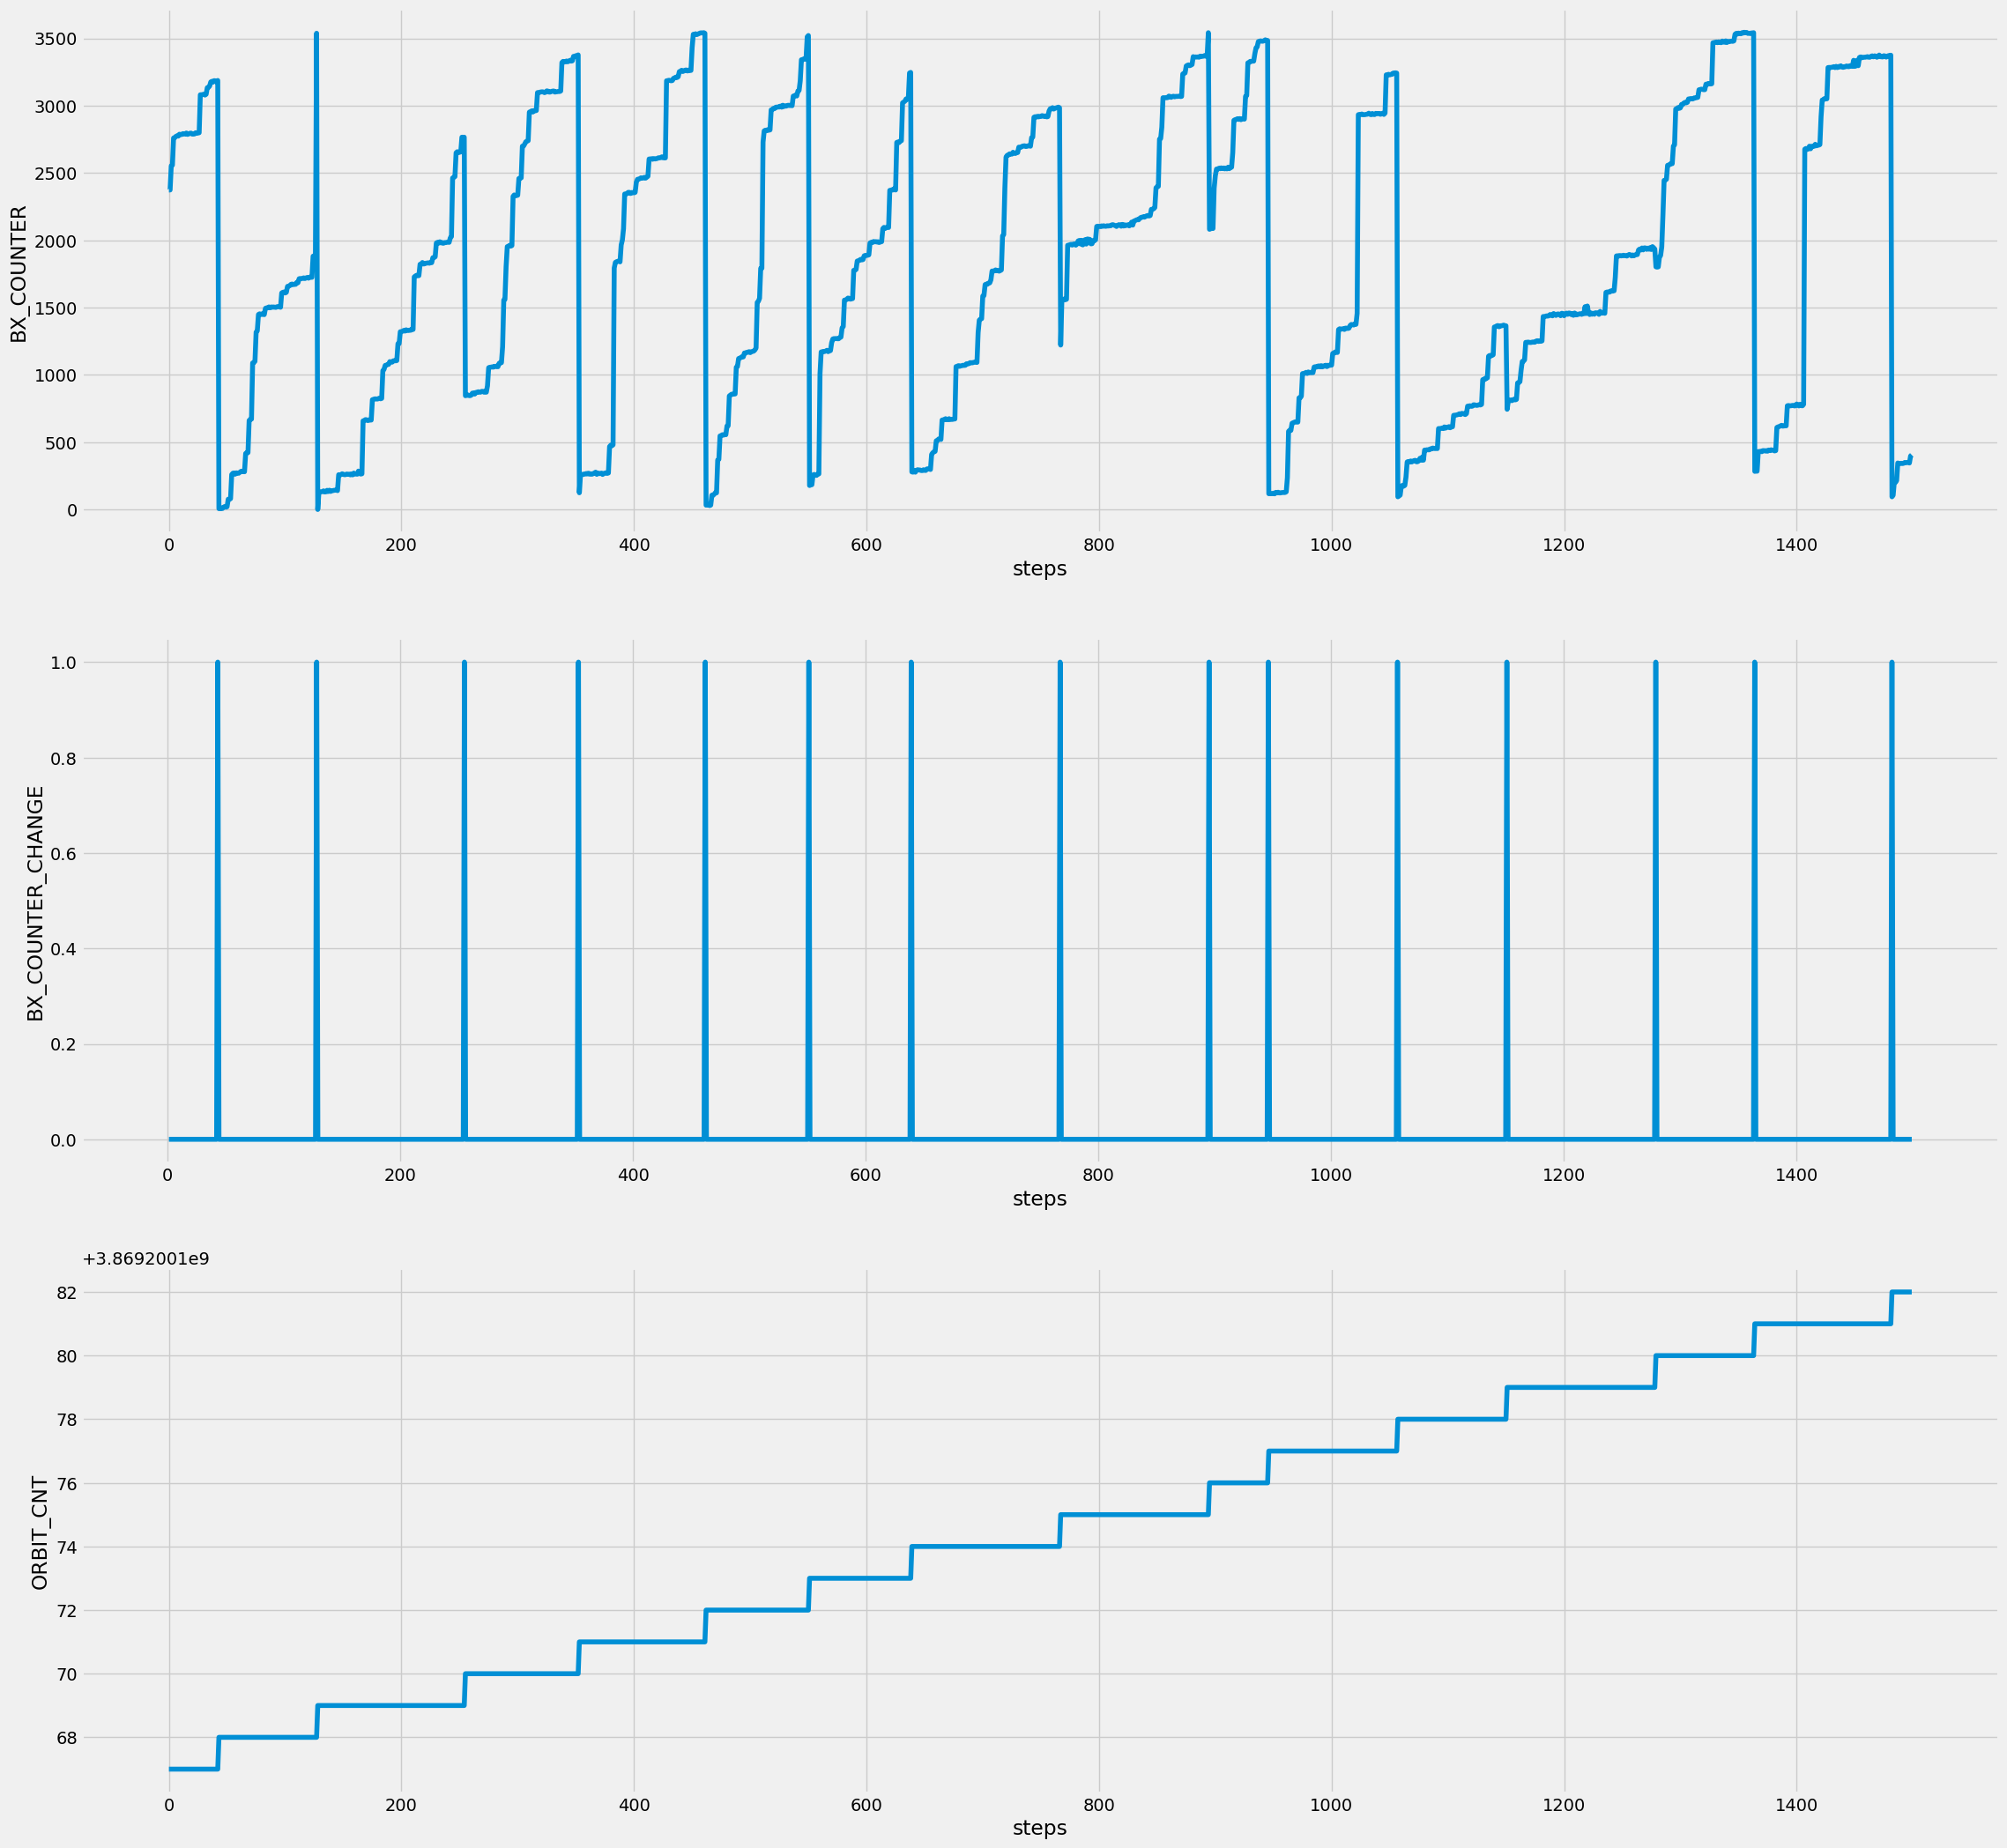

x is : 3563 ns


In [23]:
plt.figure(figsize = (25, 25))

plt.subplot(3, 1, 1)
plt.plot(data['BX_COUNTER'][0:1500])
plt.xlabel('steps')
plt.ylabel('BX_COUNTER')

plt.subplot(3, 1, 2)
plt.plot(data['BX_COUNTER_CHANGE'][0:1500])
plt.xlabel('steps')
plt.ylabel('BX_COUNTER_CHANGE')

plt.subplot(3, 1, 3)
plt.plot(data['ORBIT_CNT'][0:1500])
plt.xlabel('steps')
plt.ylabel('ORBIT_CNT')

plt.show()

X = data['BX_COUNTER'].max()
print( "x is :", X , "ns")

Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition, and convert the new column to a Time Series.

Hint: introduce an offset to the absolute time such that the start of the data acquisition (i.e. the first entry) is zero.

In [24]:
data['Time_ns'] = X*25* data['ORBIT_CNT'] + 25 *data['BX_COUNTER'] + (25/30) *data['TDC_MEAS']
data['Time_ns'] = pd.to_datetime(data['Time_ns'], unit='ns')
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,BX_COUNTER_CHANGE,Time_ns
0,1,0,123,3869200167,2374,26,NaN,1970-01-04 23:44:09.004934896
1,1,0,124,3869200167,2374,27,0.0,1970-01-04 23:44:09.004934897
2,1,0,63,3869200167,2553,28,0.0,1970-01-04 23:44:09.004939373
3,1,0,64,3869200167,2558,19,0.0,1970-01-04 23:44:09.004939490
4,1,0,64,3869200167,2760,25,0.0,1970-01-04 23:44:09.004944545
...,...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,0.0,1970-01-04 23:44:09.985075886
1310716,1,1,4,3869211171,763,11,0.0,1970-01-04 23:44:09.985075909
1310717,1,0,64,3869211171,764,0,0.0,1970-01-04 23:44:09.985075925
1310718,1,0,139,3869211171,769,0,0.0,1970-01-04 23:44:09.985076050


4. Find out the duration of the data taking in hours, minutes and seconds, by using the features of the Time Series. Perform this check reading the whole dataset.

In [27]:
t = data['Time_ns'].max() - data['Time_ns'].min()
print("The duration is ", t)

The duration is  0 days 00:00:00.980141154


5\. Use the `.groupby()` method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [28]:
data.groupby(['TDC_CHANNEL']).count().sort_values(by="HEAD", ascending=False)[:3]

,HEAD,FPGA,ORBIT_CNT,BX_COUNTER,TDC_MEAS,BX_COUNTER_CHANGE,Time_ns
TDC_CHANNEL,,,,,,,
139,108059,108059,108059,108059,108059,108059,108059
64,66020,66020,66020,66020,66020,66020,66020
63,64642,64642,64642,64642,64642,64642,64642


6. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit).



In [29]:
no_empty_orbits= data.groupby("ORBIT_CNT").count()
print("The number of  non-empty orbits is %d."%len(no_empty_orbits))

The number of unique non-empty orbits (i.e. the number of orbits with at least one hit) is 11001.


7. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139.



In [31]:
unique_orbits=pd.DataFrame(data[data['TDC_CHANNEL']==139]).drop_duplicates(subset=['ORBIT_CNT','BX_COUNTER'], inplace=False)
print("The number of unique orbits with at least one measurement from TDC_CHANNEL 139 is %d."%len(unique_orbits))

The number of unique orbits with at least one measurement from TDC_CHANNEL 139 is 107009.


8. Create two Series (one for each FPGA) that have the TDC channel as index, and the number of counts for the corresponding TDC channel as values.



In [32]:
FPGA_0 = pd.Series(data[data['FPGA']==0]['TDC_CHANNEL'].value_counts())
FPGA_1 = pd.Series(data[data['FPGA']==1]['TDC_CHANNEL'].value_counts())

In [15]:
FPGA_1

2      32669
139    32442
1      28438
4      26403
3      21970
       ...  
9         80
130       38
138       36
137       36
129       35
Name: TDC_CHANNEL, Length: 132, dtype: int64

In [33]:
FPGA_0

139    75617
64     64581
63     63724
61     48699
62     48275
       ...  
130       33
137       32
30         4
129        2
39         1
Name: TDC_CHANNEL, Length: 124, dtype: int64

9\. **Optional:** Create two histograms (one for each FPGA) that show the number of counts for each TDC channel.

Text(0, 0.5, 'Count')

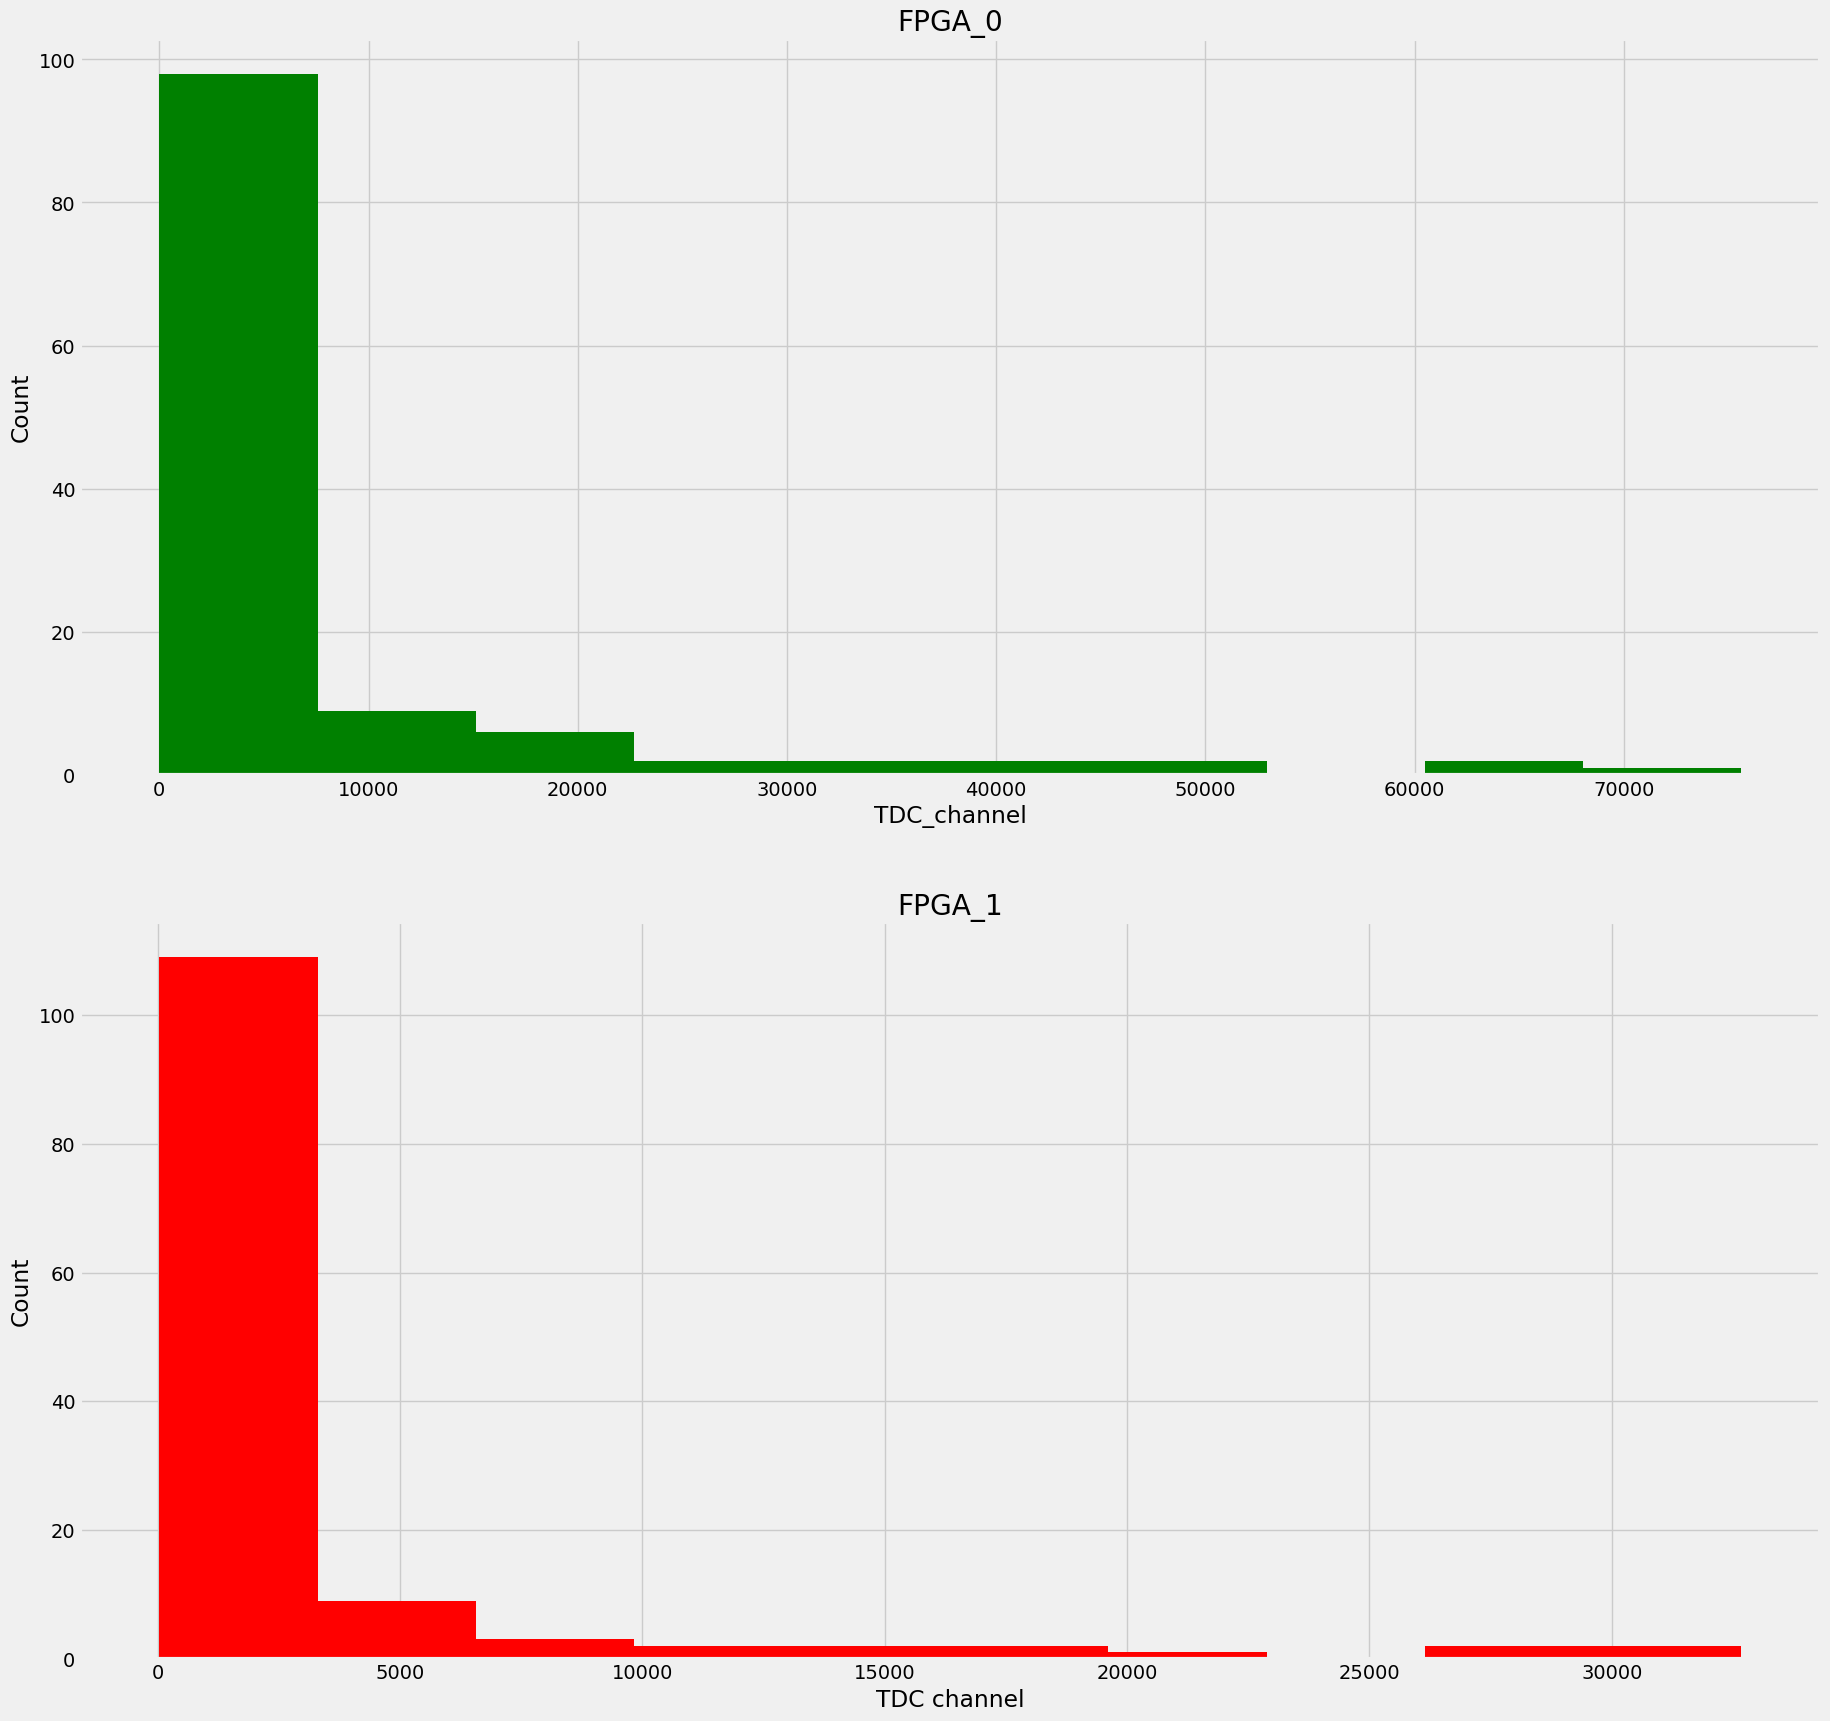

In [34]:
plt.figure(figsize = (20, 20))

plt.subplot(2,1,1)
plt.hist(FPGA_0 , color ='g')
plt.title('FPGA_0' )
plt.xlabel('TDC_channel')
plt.ylabel('Count')

plt.subplot(2,1,2)
plt.hist(FPGA_1, color='r')
plt.title('FPGA_1')
plt.xlabel('TDC channel')
plt.ylabel('Count')